# Restaurant Industry Consulting Firm
July 15, 2019<br>
Ngoc, Data Cleaning

-----------------

In this notebook, we want to:
- Clean data for Inferential Statistics step
- Two independent variables of interest: cuisine and open_pass_midnight
- Two targeted variables of interest: rating and review_count

-------------------

## Import Needed Libraries

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import helper_functions as hf
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

## Load Needed Data

In [2]:
df = pd.read_pickle("data/df_business_details.pkl")

Quick glance:

In [3]:
print(len(df))
df.head()

6754


,alias,categories,coordinates,display_phone,hours,id,image_url,is_claimed,is_closed,location,messaging,name,phone,photos,price,rating,review_count,special_hours,transactions,url
0,not-your-average-joes-silver-spring-2,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","{'latitude': 38.9973970530383, 'longitude': -7...",(240) 839-3400,"[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,https://s3-media3.fl.yelpcdn.com/bphoto/mZpusp...,True,False,"{'address1': '8661 Colesville Rd', 'address2':...",{'url': 'https://www.yelp.com/raq/not-your-ave...,Not Your Average Joe's,+12408393400,[https://s3-media3.fl.yelpcdn.com/bphoto/mZpus...,$$,3.5,372,NaN,[],https://www.yelp.com/biz/not-your-average-joes...
1,california-pizza-kitchen-at-tysons-corner-mcle...,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","{'latitude': 38.9195057726529, 'longitude': -7...",(703) 761-1473,"[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,https://s3-media1.fl.yelpcdn.com/bphoto/kfu56b...,True,False,"{'address1': '7939 Tysons Corner Ctr', 'addres...",NaN,California Pizza Kitchen at Tysons Corner,+17037611473,[https://s3-media1.fl.yelpcdn.com/bphoto/kfu56...,$$,3.5,192,NaN,"[delivery, pickup]",https://www.yelp.com/biz/california-pizza-kitc...
2,ihop-college-park,"[{'alias': 'breakfast_brunch', 'title': 'Break...","{'latitude': 39.01419, 'longitude': -76.92827}",(301) 982-7400,"[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,https://s3-media2.fl.yelpcdn.com/bphoto/zGN5vL...,True,False,"{'address1': '9680 Baltimore Ave', 'address2':...",NaN,IHOP,+13019827400,[https://s3-media2.fl.yelpcdn.com/bphoto/zGN5v...,$$,2.5,125,NaN,"[pickup, delivery]",https://www.yelp.com/biz/ihop-college-park?adj...
3,capitol-seafood-and-crab-district-heights,"[{'alias': 'seafood', 'title': 'Seafood'}]","{'latitude': 38.8541450500488, 'longitude': -7...",(301) 568-9234,NaN,-34232Z9Njha7auSGehjdQ,https://s3-media3.fl.yelpcdn.com/bphoto/4Kbfcc...,False,False,"{'address1': '6326 Marlboro Pike', 'address2':...",NaN,Capitol Seafood & Crab,+13015689234,[https://s3-media3.fl.yelpcdn.com/bphoto/4Kbfc...,$,4.0,13,NaN,[],https://www.yelp.com/biz/capitol-seafood-and-c...
4,dunkin-donuts-alexandria-25,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...","{'latitude': 38.79054, 'longitude': -77.0764549}",(703) 379-1210,"[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,https://s3-media2.fl.yelpcdn.com/bphoto/oRtqDM...,False,False,"{'address1': '5836B N Kings Hwy', 'address2': ...",NaN,Dunkin’ Donuts,+17033791210,[https://s3-media2.fl.yelpcdn.com/bphoto/oRtqD...,$,4.5,2,NaN,[],https://www.yelp.com/biz/dunkin-donuts-alexand...


## EDA

Drop columns (straight out) not needed:

In [4]:
df.drop(columns=["alias", "coordinates", "display_phone", "image_url", "is_claimed", "is_closed",
                 "messaging", "phone", "photos", "price", "transactions", "url"], inplace=True, axis=1)

More in-depth look:

In [5]:
df.head()

,categories,hours,id,location,name,rating,review_count,special_hours
0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,"{'address1': '8661 Colesville Rd', 'address2':...",Not Your Average Joe's,3.5,372,NaN
1,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,"{'address1': '7939 Tysons Corner Ctr', 'addres...",California Pizza Kitchen at Tysons Corner,3.5,192,NaN
2,"[{'alias': 'breakfast_brunch', 'title': 'Break...","[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,"{'address1': '9680 Baltimore Ave', 'address2':...",IHOP,2.5,125,NaN
3,"[{'alias': 'seafood', 'title': 'Seafood'}]",NaN,-34232Z9Njha7auSGehjdQ,"{'address1': '6326 Marlboro Pike', 'address2':...",Capitol Seafood & Crab,4.0,13,NaN
4,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...","[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,"{'address1': '5836B N Kings Hwy', 'address2': ...",Dunkin’ Donuts,4.5,2,NaN


In [6]:
df.shape

(6754, 8)

Check for duplicates:

In [7]:
sum(df.id.duplicated())

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6754 entries, 0 to 6753
Data columns (total 8 columns):
categories       6754 non-null object
hours            5650 non-null object
id               6754 non-null object
location         6754 non-null object
name             6754 non-null object
rating           6754 non-null float64
review_count     6754 non-null int64
special_hours    126 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 422.2+ KB


hours and special_hours need special treatments.

### Hours

In [9]:
df.iloc[0].hours

[{'open': [{'is_overnight': False, 'start': '1100', 'end': '2200', 'day': 0},
   {'is_overnight': False, 'start': '1100', 'end': '2300', 'day': 1},
   {'is_overnight': False, 'start': '1100', 'end': '2300', 'day': 2},
   {'is_overnight': False, 'start': '1100', 'end': '2300', 'day': 3},
   {'is_overnight': False, 'start': '1100', 'end': '0000', 'day': 4},
   {'is_overnight': False, 'start': '1100', 'end': '0000', 'day': 5},
   {'is_overnight': False, 'start': '1100', 'end': '2200', 'day': 6}],
  'hours_type': 'REGULAR',
  'is_open_now': False}]

Two things of interest: is_overnight and hours_type

**is_overnight**

In [10]:
hours = df[~df.hours.isna()]
hours.reset_index(inplace=True, drop=True)

In [11]:
overnight = []
for row in range(len(hours)):
    for h in hours.iloc[row].hours[0]["open"]:
        if h["is_overnight"] != False:
            overnight.append(hours.iloc[row].id)
            break
print(len(overnight))
overnight[:5]

1124


['-1Jfl_zix9l1RRWOPmzSEQ',
 '-4B2Bm0hXrr043xOj85dog',
 '-7mtTaJVlmx9TqWM-CAw-A',
 '-8TkrTNeebNwFGcfDKJgRQ',
 '-8cgezcs-xEpJ_K4O8LxVA']

Check:

In [12]:
hours[hours.id == "-8TkrTNeebNwFGcfDKJgRQ"]["hours"].iloc[0]

[{'open': [{'is_overnight': True, 'start': '1500', 'end': '0200', 'day': 0},
   {'is_overnight': True, 'start': '1500', 'end': '0200', 'day': 1},
   {'is_overnight': True, 'start': '1100', 'end': '0200', 'day': 2},
   {'is_overnight': True, 'start': '1100', 'end': '0200', 'day': 3},
   {'is_overnight': True, 'start': '1100', 'end': '0200', 'day': 4},
   {'is_overnight': True, 'start': '1100', 'end': '0200', 'day': 5},
   {'is_overnight': True, 'start': '1100', 'end': '0200', 'day': 6}],
  'hours_type': 'REGULAR',
  'is_open_now': True}]

In [13]:
hours[hours.id == "28zGYjDKjDCPOTWWO11NHw"]["hours"].iloc[0]

[{'open': [{'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 0},
   {'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 1},
   {'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 2},
   {'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 3},
   {'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 4},
   {'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 5},
   {'is_overnight': True, 'start': '0000', 'end': '0000', 'day': 6}],
  'hours_type': 'REGULAR',
  'is_open_now': True}]

Add an open_pass_midnight column:

In [14]:
df["open_pass_midnight"] = [True if i in overnight else False for i in df.id]

In [15]:
print(sum(df.open_pass_midnight))
df.head()

1124


,categories,hours,id,location,name,rating,review_count,special_hours,open_pass_midnight
0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",--saaXOpXBfC6-pvmTP5mw,"{'address1': '8661 Colesville Rd', 'address2':...",Not Your Average Joe's,3.5,372,NaN,False
1,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...","[{'open': [{'is_overnight': False, 'start': '1...",-0EptA8Ci4gad0arJph4VQ,"{'address1': '7939 Tysons Corner Ctr', 'addres...",California Pizza Kitchen at Tysons Corner,3.5,192,NaN,False
2,"[{'alias': 'breakfast_brunch', 'title': 'Break...","[{'open': [{'is_overnight': False, 'start': '0...",-1Jfl_zix9l1RRWOPmzSEQ,"{'address1': '9680 Baltimore Ave', 'address2':...",IHOP,2.5,125,NaN,True
3,"[{'alias': 'seafood', 'title': 'Seafood'}]",NaN,-34232Z9Njha7auSGehjdQ,"{'address1': '6326 Marlboro Pike', 'address2':...",Capitol Seafood & Crab,4.0,13,NaN,False
4,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...","[{'open': [{'is_overnight': False, 'start': '0...",-34O36suTEIwy0DIvpW8PA,"{'address1': '5836B N Kings Hwy', 'address2': ...",Dunkin’ Donuts,4.5,2,NaN,False


**hours_type**

In [16]:
hours_types = []
for row in range(len(hours)):
    if hours.iloc[row].hours[0]["hours_type"] != "REGULAR":
        hours_types.append(hours.iloc[row].id)
print(len(hours_types))
hours_types

0


[]

Don't have to worry about this.

Get rid of hours column:

In [17]:
df.drop(columns=["hours"], inplace=True, axis=1)

In [18]:
df.head()

,categories,id,location,name,rating,review_count,special_hours,open_pass_midnight
0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",--saaXOpXBfC6-pvmTP5mw,"{'address1': '8661 Colesville Rd', 'address2':...",Not Your Average Joe's,3.5,372,NaN,False
1,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",-0EptA8Ci4gad0arJph4VQ,"{'address1': '7939 Tysons Corner Ctr', 'addres...",California Pizza Kitchen at Tysons Corner,3.5,192,NaN,False
2,"[{'alias': 'breakfast_brunch', 'title': 'Break...",-1Jfl_zix9l1RRWOPmzSEQ,"{'address1': '9680 Baltimore Ave', 'address2':...",IHOP,2.5,125,NaN,True
3,"[{'alias': 'seafood', 'title': 'Seafood'}]",-34232Z9Njha7auSGehjdQ,"{'address1': '6326 Marlboro Pike', 'address2':...",Capitol Seafood & Crab,4.0,13,NaN,False
4,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",-34O36suTEIwy0DIvpW8PA,"{'address1': '5836B N Kings Hwy', 'address2': ...",Dunkin’ Donuts,4.5,2,NaN,False


### Special Hours

In [19]:
special_hours = df[~df.special_hours.isna()]
special_hours.reset_index(inplace=True, drop=True)

In [20]:
print(len(special_hours))
special_hours.head()

126


,categories,id,location,name,rating,review_count,special_hours,open_pass_midnight
0,"[{'alias': 'southafrican', 'title': 'South Afr...",-JdOButHwsdCxV7PocnSdg,"{'address1': '4401 Wilson Blvd', 'address2': N...",Nando's PERi-PERi,3.5,103,"[{'date': '2019-11-28', 'is_closed': True, 'st...",False
1,"[{'alias': 'fooddeliveryservices', 'title': 'F...",068uD-eBFAylOBR7mqutog,"{'address1': '5874 Crossroads Ctr', 'address2'...",Paisano's,3.5,92,"[{'date': '2019-11-28', 'is_closed': True, 'st...",False
2,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",09t1c--C1-NjRnaJ_FIIWw,"{'address1': '1475 Pennsylvania Ave NW', 'addr...",The Occidental,3.5,396,"[{'date': '2019-09-02', 'is_closed': True, 'st...",False
3,"[{'alias': 'mexican', 'title': 'Mexican'}]",0A0miTWeACDow_gzTEo52w,"{'address1': '4600 Wisconsin Ave NW', 'address...",District Taco,3.0,74,"[{'date': '2019-11-21', 'is_closed': True, 'st...",False
4,"[{'alias': 'hotdogs', 'title': 'Fast Food'}]",0Bqsb5wAsqzqTcMv2lMemw,"{'address1': '12001 Rockville Pike', 'address2...",Chick-fil-A,3.0,175,"[{'date': '2019-09-02', 'is_closed': None, 'st...",False


In [21]:
print(str(round(len(special_hours) / len(df) * 100, 2)) + "%")

1.87%


Very little data to begin with.

Find restaurants actually having special hours:

In [22]:
open_special_dates = []
for row in range(len(special_hours)):
    for sh in special_hours.iloc[row].special_hours:
        if sh["is_closed"] != True:
            open_special_dates.append(special_hours.iloc[row].id)
            break
print(len(open_special_dates))
open_special_dates[:5]

37


['0Bqsb5wAsqzqTcMv2lMemw',
 '0k8Flxj4LYElTgUNjDB-nA',
 '3AGZuiT_wrZbywBgQK81Gg',
 'BV2E2-sE2EG7IqWWqz-Ckg',
 'D17RgrlLBMamQRye9fYwnA']

There are only 37 restaurants having special hours.

In [23]:
print(str(round(len(open_special_dates) / len(df) * 100, 2)) + "%")

0.55%


Not enough data.

Just out of curiosity, what are the special dates?

In [24]:
special_dates = []
for row in range(len(special_hours)):
    for sh in special_hours.iloc[row].special_hours:
        if sh["is_closed"] != True:
            if sh["date"] not in special_dates:
                special_dates.append(sh["date"])
print(len(special_dates))
special_dates

14


['2019-09-02',
 '2019-11-29',
 '2019-12-24',
 '2019-12-31',
 '2020-01-01',
 '2019-11-28',
 '2019-10-14',
 '2019-11-11',
 '2019-07-20',
 '2019-08-17',
 '2019-07-13',
 '2019-08-13',
 '2019-09-03',
 '2019-12-25']

Any overnight on these special dates?

In [25]:
open_overnight_special = []
for row in range(len(special_hours)):
    for sh in special_hours.iloc[row].special_hours:
        if sh["is_overnight"] != False:
            if sh["is_overnight"] != None:
                open_overnight_special.append(special_hours.iloc[row].id)
print(len(open_overnight_special))
open_overnight_special

1


['0k8Flxj4LYElTgUNjDB-nA']

In [26]:
df[df.id == "0k8Flxj4LYElTgUNjDB-nA"].special_hours.iloc[0]

[{'date': '2019-11-28',
  'is_closed': None,
  'start': '1500',
  'end': '2030',
  'is_overnight': False},
 {'date': '2019-12-24',
  'is_closed': None,
  'start': '1600',
  'end': '2130',
  'is_overnight': False},
 {'date': '2019-12-25',
  'is_closed': True,
  'start': None,
  'end': None,
  'is_overnight': None},
 {'date': '2019-12-26',
  'is_closed': True,
  'start': None,
  'end': None,
  'is_overnight': None},
 {'date': '2019-12-31',
  'is_closed': None,
  'start': '1700',
  'end': '0100',
  'is_overnight': True}]

In [27]:
print(str(round(len(open_overnight_special) / len(df) * 100, 2)) + "%")

0.01%


There is only 1 restaurant open overnight and it's only open on New Year's Eve until 1 a.m. on New Year's Day.<br>
Not enough data.

Get rid of special_hours column:

In [28]:
df.drop(columns=["special_hours"], inplace=True, axis=1)

In [29]:
df.head()

,categories,id,location,name,rating,review_count,open_pass_midnight
0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",--saaXOpXBfC6-pvmTP5mw,"{'address1': '8661 Colesville Rd', 'address2':...",Not Your Average Joe's,3.5,372,False
1,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",-0EptA8Ci4gad0arJph4VQ,"{'address1': '7939 Tysons Corner Ctr', 'addres...",California Pizza Kitchen at Tysons Corner,3.5,192,False
2,"[{'alias': 'breakfast_brunch', 'title': 'Break...",-1Jfl_zix9l1RRWOPmzSEQ,"{'address1': '9680 Baltimore Ave', 'address2':...",IHOP,2.5,125,True
3,"[{'alias': 'seafood', 'title': 'Seafood'}]",-34232Z9Njha7auSGehjdQ,"{'address1': '6326 Marlboro Pike', 'address2':...",Capitol Seafood & Crab,4.0,13,False
4,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",-34O36suTEIwy0DIvpW8PA,"{'address1': '5836B N Kings Hwy', 'address2': ...",Dunkin’ Donuts,4.5,2,False


### State

In [30]:
df.location[0]

{'address1': '8661 Colesville Rd',
 'address2': 'Ste C-153',
 'address3': None,
 'city': 'Silver Spring',
 'zip_code': '20910',
 'country': 'US',
 'state': 'MD',
 'display_address': ['8661 Colesville Rd',
  'Ste C-153',
  'Silver Spring, MD 20910'],
 'cross_streets': ''}

Add a state column:

In [31]:
df["state"] = df.location.apply(lambda x: x["state"])

Let's check:

In [32]:
df.state.value_counts()

DC     2679
VA     2081
MD     1968
CA        3
OH        3
LA        2
AL        2
TN        2
MN        2
NLN       2
IL        1
KS        1
NE        1
NDN       1
GA        1
MO        1
TX        1
UT        1
AZ        1
XGM       1
Name: state, dtype: int64

Get rid of anything that's not in the DMV area:

In [33]:
dmv = ["DC", "VA", "MD"]
df = df[df.state.isin(dmv)]

In [34]:
df.reset_index(inplace=True, drop=True)

In [35]:
df.head()

,categories,id,location,name,rating,review_count,open_pass_midnight,state
0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",--saaXOpXBfC6-pvmTP5mw,"{'address1': '8661 Colesville Rd', 'address2':...",Not Your Average Joe's,3.5,372,False,MD
1,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",-0EptA8Ci4gad0arJph4VQ,"{'address1': '7939 Tysons Corner Ctr', 'addres...",California Pizza Kitchen at Tysons Corner,3.5,192,False,VA
2,"[{'alias': 'breakfast_brunch', 'title': 'Break...",-1Jfl_zix9l1RRWOPmzSEQ,"{'address1': '9680 Baltimore Ave', 'address2':...",IHOP,2.5,125,True,MD
3,"[{'alias': 'seafood', 'title': 'Seafood'}]",-34232Z9Njha7auSGehjdQ,"{'address1': '6326 Marlboro Pike', 'address2':...",Capitol Seafood & Crab,4.0,13,False,MD
4,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",-34O36suTEIwy0DIvpW8PA,"{'address1': '5836B N Kings Hwy', 'address2': ...",Dunkin’ Donuts,4.5,2,False,VA


Let's check:

In [36]:
df.state.value_counts()

DC    2679
VA    2081
MD    1968
Name: state, dtype: int64

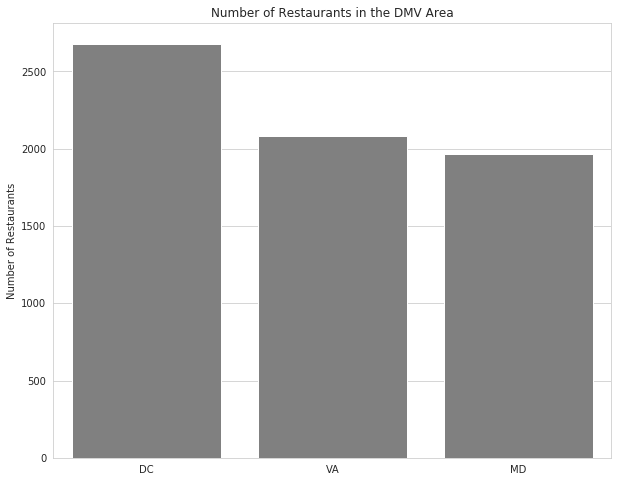

In [37]:
state_count = df.state.value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(state_count.index, state_count.values, color="grey")
plt.title("Number of Restaurants in the DMV Area")
plt.ylabel("Number of Restaurants")
plt.show()

Nice! Enough data for each group.

Get rid of location column:

In [38]:
df.drop(columns=["location"], inplace=True, axis=1)

In [39]:
df.head()

,categories,id,name,rating,review_count,open_pass_midnight,state
0,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,3.5,372,False,MD
1,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,3.5,192,False,VA
2,"[{'alias': 'breakfast_brunch', 'title': 'Break...",-1Jfl_zix9l1RRWOPmzSEQ,IHOP,2.5,125,True,MD
3,"[{'alias': 'seafood', 'title': 'Seafood'}]",-34232Z9Njha7auSGehjdQ,Capitol Seafood & Crab,4.0,13,False,MD
4,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",-34O36suTEIwy0DIvpW8PA,Dunkin’ Donuts,4.5,2,False,VA


**DFs for open_pass_midnight per state**

In [40]:
sum(df.open_pass_midnight)

1117

In [41]:
dc_midnight = df[df.state == "DC"]
dc_midnight.drop(columns=["categories"], inplace=True, axis=1)
dc_midnight.shape

(2679, 6)

In [42]:
va_midnight = df[df.state == "VA"]
va_midnight.drop(columns=["categories"], inplace=True, axis=1)
va_midnight.shape

(2081, 6)

In [43]:
md_midnight = df[df.state == "MD"]
md_midnight.drop(columns=["categories"], inplace=True, axis=1)
md_midnight.shape

(1968, 6)

### Cuisines

Study each area's most popular cuisines:

In [44]:
df["cuisines"] = df.categories.apply(lambda x: "|".join([i["title"] for i in x]))

Get rid of categories column:

In [45]:
df.drop(columns=["categories"], inplace=True, axis=1)

In [46]:
df.head()

,id,name,rating,review_count,open_pass_midnight,state,cuisines
0,--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,3.5,372,False,MD,Salad|Seafood|American (Traditional)
1,-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,3.5,192,False,VA,Pizza|American (New)|Salad
2,-1Jfl_zix9l1RRWOPmzSEQ,IHOP,2.5,125,True,MD,Breakfast & Brunch|American (Traditional)|Burgers
3,-34232Z9Njha7auSGehjdQ,Capitol Seafood & Crab,4.0,13,False,MD,Seafood
4,-34O36suTEIwy0DIvpW8PA,Dunkin’ Donuts,4.5,2,False,VA,Donuts|Coffee & Tea|Breakfast & Brunch


Use helper function to split cuisines:

In [47]:
df_add = hf.split_rows(df, "id", "cuisines", "|")
df_add.rename(columns={"index": "cuisine", 0: "id"}, inplace=True)
df_add.head()

,cuisine,id
0,Salad,--saaXOpXBfC6-pvmTP5mw
1,Seafood,--saaXOpXBfC6-pvmTP5mw
2,American (Traditional),--saaXOpXBfC6-pvmTP5mw
3,Pizza,-0EptA8Ci4gad0arJph4VQ
4,American (New),-0EptA8Ci4gad0arJph4VQ


In [48]:
df.head()

,id,name,rating,review_count,open_pass_midnight,state,cuisines
0,--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,3.5,372,False,MD,Salad|Seafood|American (Traditional)
1,-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,3.5,192,False,VA,Pizza|American (New)|Salad
2,-1Jfl_zix9l1RRWOPmzSEQ,IHOP,2.5,125,True,MD,Breakfast & Brunch|American (Traditional)|Burgers
3,-34232Z9Njha7auSGehjdQ,Capitol Seafood & Crab,4.0,13,False,MD,Seafood
4,-34O36suTEIwy0DIvpW8PA,Dunkin’ Donuts,4.5,2,False,VA,Donuts|Coffee & Tea|Breakfast & Brunch


Join with original df:

In [49]:
df = df.merge(df_add, on="id", how="inner")

In [50]:
df.drop(columns=["cuisines"], inplace=True, axis=1)

In [51]:
df.head(10)

,id,name,rating,review_count,open_pass_midnight,state,cuisine
0,--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,3.5,372,False,MD,Salad
1,--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,3.5,372,False,MD,Seafood
2,--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,3.5,372,False,MD,American (Traditional)
3,-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,3.5,192,False,VA,Pizza
4,-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,3.5,192,False,VA,American (New)
5,-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,3.5,192,False,VA,Salad
6,-1Jfl_zix9l1RRWOPmzSEQ,IHOP,2.5,125,True,MD,Breakfast & Brunch
7,-1Jfl_zix9l1RRWOPmzSEQ,IHOP,2.5,125,True,MD,American (Traditional)
8,-1Jfl_zix9l1RRWOPmzSEQ,IHOP,2.5,125,True,MD,Burgers
9,-34232Z9Njha7auSGehjdQ,Capitol Seafood & Crab,4.0,13,False,MD,Seafood


In [52]:
len(df)

13946

Split data, state wise:

In [53]:
dc = df[df.state == "DC"]
dc.shape

(5594, 7)

In [54]:
va = df[df.state == "VA"]
va.shape

(4382, 7)

In [55]:
md = df[df.state == "MD"]
md.shape

(3970, 7)

**DC**

Total number of restaurants for each cuisine:

In [56]:
dc_count_by_cuisine = dc.groupby("cuisine")["review_count"].count()

In [57]:
dc_count_by_cuisine.sort_values(ascending=False).head()

cuisine
Sandwiches                403
Breakfast & Brunch        259
American (New)            249
American (Traditional)    241
Fast Food                 238
Name: review_count, dtype: int64

We want cuisines that have at least 20 restaurants:

In [58]:
dc_cuisines = dc_count_by_cuisine[dc_count_by_cuisine >= 20].index

In [59]:
print(len(dc_cuisines))
dc_cuisines

60


Index(['American (New)', 'American (Traditional)', 'Asian Fusion', 'Bakeries',
       'Barbeque', 'Bars', 'Beer Bar', 'Breakfast & Brunch', 'Burgers',
       'Cafes', 'Caribbean', 'Chicken Shop', 'Chicken Wings', 'Chinese',
       'Cocktail Bars', 'Coffee & Tea', 'Delis', 'Desserts', 'Diners',
       'Ethiopian', 'Fast Food', 'Food Stands', 'Food Trucks', 'French',
       'Gluten-Free', 'Greek', 'Halal', 'Indian', 'Italian', 'Japanese',
       'Juice Bars & Smoothies', 'Korean', 'Latin American', 'Lounges',
       'Mediterranean', 'Mexican', 'Middle Eastern', 'Pizza', 'Pubs', 'Ramen',
       'Salad', 'Salvadoran', 'Sandwiches', 'Seafood', 'Soul Food', 'Soup',
       'Southern', 'Spanish', 'Sports Bars', 'Steakhouses', 'Sushi Bars',
       'Tacos', 'Tapas/Small Plates', 'Tex-Mex', 'Thai', 'Vegan', 'Vegetarian',
       'Venues & Event Spaces', 'Vietnamese', 'Wine Bars'],
      dtype='object', name='cuisine')

Update dc df:

In [60]:
dc_new = dc[dc.cuisine.isin(dc_cuisines)]
dc_new.reset_index(inplace=True, drop=True)

In [61]:
print(len(dc_new))
dc_new.head()

4882


,id,name,rating,review_count,open_pass_midnight,state,cuisine
0,-3r9TfGuLzx_CRh9b8u6iA,Absolute Thai Restaurant,3.5,374,False,DC,Thai
1,-7AZWvUzAiAI-rnAW-WoqQ,Ricks Cafe,3.5,72,False,DC,Caribbean
2,-8KtYXAQNOh1339Z7gl4WQ,Chopt Creative Salad Co.,3.0,50,False,DC,Salad
3,-8KtYXAQNOh1339Z7gl4WQ,Chopt Creative Salad Co.,3.0,50,False,DC,Vegetarian
4,-8cgezcs-xEpJ_K4O8LxVA,Harry's Restaurant,3.0,449,True,DC,American (Traditional)


**VA**

Total number of restaurants for each cuisine:

In [62]:
va_count_by_cuisine = va.groupby("cuisine")["review_count"].count()

In [63]:
va_count_by_cuisine.sort_values(ascending=False).head()

cuisine
Sandwiches                288
Fast Food                 237
Pizza                     216
American (Traditional)    191
Breakfast & Brunch        153
Name: review_count, dtype: int64

We want cuisines that have at least 20 restaurants:

In [64]:
va_cuisines = va_count_by_cuisine[va_count_by_cuisine >= 20].index

In [65]:
print(len(va_cuisines))
va_cuisines

46


Index(['American (New)', 'American (Traditional)', 'Asian Fusion', 'Bakeries',
       'Barbeque', 'Bars', 'Breakfast & Brunch', 'Buffets', 'Burgers', 'Cafes',
       'Chicken Shop', 'Chicken Wings', 'Chinese', 'Cocktail Bars',
       'Coffee & Tea', 'Delis', 'Desserts', 'Ethiopian', 'Fast Food',
       'Food Trucks', 'Greek', 'Halal', 'Indian', 'Italian', 'Japanese',
       'Korean', 'Latin American', 'Mediterranean', 'Mexican',
       'Middle Eastern', 'Noodles', 'Peruvian', 'Pizza', 'Salad', 'Salvadoran',
       'Sandwiches', 'Seafood', 'Soup', 'Sports Bars', 'Steakhouses',
       'Sushi Bars', 'Tex-Mex', 'Thai', 'Vegetarian', 'Vietnamese',
       'Wine Bars'],
      dtype='object', name='cuisine')

Update va df:

In [66]:
va_new = va[va.cuisine.isin(va_cuisines)]
va_new.reset_index(inplace=True, drop=True)

In [67]:
print(len(va_new))
va_new.head()

3653


,id,name,rating,review_count,open_pass_midnight,state,cuisine
0,-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,3.5,192,False,VA,Pizza
1,-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,3.5,192,False,VA,American (New)
2,-0EptA8Ci4gad0arJph4VQ,California Pizza Kitchen at Tysons Corner,3.5,192,False,VA,Salad
3,-34O36suTEIwy0DIvpW8PA,Dunkin’ Donuts,4.5,2,False,VA,Coffee & Tea
4,-34O36suTEIwy0DIvpW8PA,Dunkin’ Donuts,4.5,2,False,VA,Breakfast & Brunch


**MD**

Total number of restaurants for each cuisine:

In [68]:
md_count_by_cuisine = md.groupby("cuisine")["review_count"].count()

In [69]:
md_count_by_cuisine.sort_values(ascending=False).head()

cuisine
Fast Food     331
Sandwiches    249
Pizza         214
Chinese       172
Mexican       162
Name: review_count, dtype: int64

We want cuisines that have at least 20 restaurants:

In [70]:
md_cuisines = md_count_by_cuisine[md_count_by_cuisine >= 20].index

In [71]:
print(len(md_cuisines))
md_cuisines

42


Index(['African', 'American (New)', 'American (Traditional)', 'Asian Fusion',
       'Bakeries', 'Barbeque', 'Bars', 'Breakfast & Brunch', 'Burgers',
       'Cafes', 'Caribbean', 'Chicken Shop', 'Chicken Wings', 'Chinese',
       'Coffee & Tea', 'Delis', 'Ethiopian', 'Fast Food', 'Food Trucks',
       'Indian', 'Italian', 'Japanese', 'Korean', 'Latin American',
       'Mediterranean', 'Mexican', 'Noodles', 'Peruvian', 'Pizza', 'Salad',
       'Salvadoran', 'Sandwiches', 'Seafood', 'Soul Food', 'Soup',
       'Sports Bars', 'Steakhouses', 'Sushi Bars', 'Tex-Mex', 'Thai',
       'Vegetarian', 'Vietnamese'],
      dtype='object', name='cuisine')

Update md df:

In [72]:
md_new = md[md.cuisine.isin(md_cuisines)]
md_new.reset_index(inplace=True, drop=True)

In [73]:
print(len(md_new))
md_new.head()

3291


,id,name,rating,review_count,open_pass_midnight,state,cuisine
0,--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,3.5,372,False,MD,Salad
1,--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,3.5,372,False,MD,Seafood
2,--saaXOpXBfC6-pvmTP5mw,Not Your Average Joe's,3.5,372,False,MD,American (Traditional)
3,-1Jfl_zix9l1RRWOPmzSEQ,IHOP,2.5,125,True,MD,Breakfast & Brunch
4,-1Jfl_zix9l1RRWOPmzSEQ,IHOP,2.5,125,True,MD,American (Traditional)


## Save Data for Inferential Statistics

In [74]:
dc_new.to_csv("data/dc_restaurants_cuisine.csv", index=False)
va_new.to_csv("data/va_restaurants_cuisine.csv", index=False)
md_new.to_csv("data/md_restaurants_cuisine.csv", index=False)
dc_midnight.to_csv("data/dc_restaurants_midnight.csv", index=False)
va_midnight.to_csv("data/va_restaurants_midnight.csv", index=False)
md_midnight.to_csv("data/md_restaurants_midnight.csv", index=False)